In [30]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
data=pd.read_csv('data.csv', sep=',')

In [5]:
data.shape

(801, 20532)

In [15]:
labels = pd.read_csv('labels.csv',sep=',')

In [16]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [17]:
labels.Class.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

Text(0.5, 0, 'Cancer Types (Labels)')

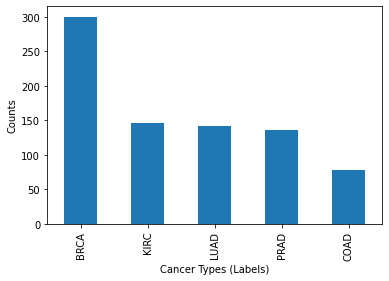

In [34]:
labels.Class.value_counts().plot(kind = 'bar')
plt.ylabel('Counts')
plt.xlabel('Cancer Types (Labels)')

In [9]:
X = data.values

In [10]:
X.shape

(801, 20532)

In [27]:
X[:1,0:20]

array([['sample_0', 0.0, 2.01720929003, 3.2655269116500003,
        5.478486512080001, 10.4319989607, 0.0, 7.175175262130001,
        0.591870870063, 0.0, 0.0, 0.591870870063, 1.3342822253,
        2.01539051939, 0.591870870063, 0.0, 0.0, 0.0, 0.0,
        0.591870870063]], dtype=object)

In [36]:
data.gene_1.describe()

count    801.000000
mean       3.010909
std        1.200828
min        0.000000
25%        2.299039
50%        3.143687
75%        3.883484
max        6.237034
Name: gene_1, dtype: float64